# Resolução

**2. Um determinado banco deve decidir se um cliente deve ou não receber um empréstimo bancário em função da sua condição de bom ou mau pagador. Considerando os dados de treinamento abaixo, aplique o classificador, no caso uma árvore de decisão, para atribuir a classe (rótulo) para o registro 12**

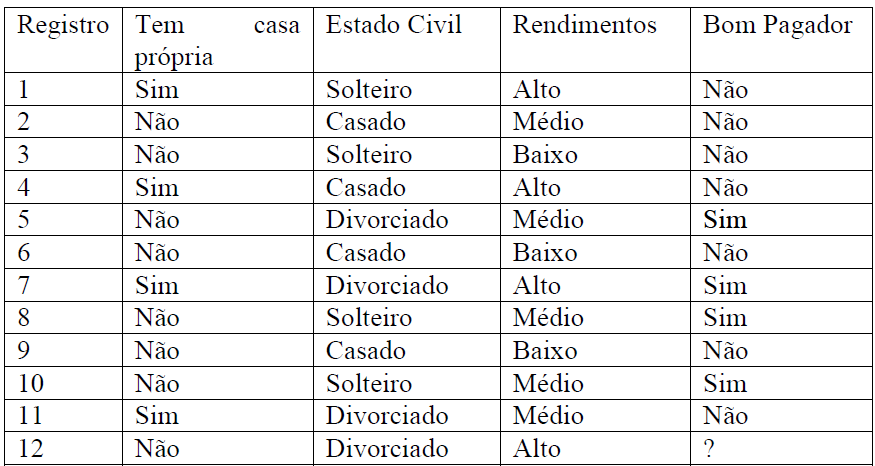

In [61]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [62]:
data = {
    'TemCasaPropria': ['Sim', 'Não', 'Não', 'Sim', 'Não', 'Não', 'Sim', 'Não', 'Não', 'Não', 'Sim', 'Não'],
    'EstadoCivil': ['Solteiro', 'Casado', 'Solteiro', 'Casado', 'Divorciado', 'Casado', 'Divorciado', 'Solteiro', 'Casado', 'Solteiro', 'Divorciado', 'Divorciado'],
    'Rendimentos': ['Alto', 'Médio', 'Baixo', 'Alto', 'Médio', 'Baixo', 'Alto', 'Médio', 'Baixo', 'Médio', 'Médio', 'Alto'],
    'BomPagador': ['Não', 'Não', 'Não', 'Não', 'Sim', 'Não', 'Sim', 'Sim', 'Não', 'Sim', 'Não', None]
}

In [65]:
df = pd.DataFrame(data)

In [66]:
# Codificando variáveis categóricas para numéricas
df['TemCasaPropria'] = df['TemCasaPropria'].map({'Sim': 1, 'Não': 0})
df['EstadoCivil'] = df['EstadoCivil'].map({'Solteiro': 0, 'Casado': 1, 'Divorciado': 2})
df['Rendimentos'] = df['Rendimentos'].map({'Baixo': 0, 'Médio': 1, 'Alto': 2})
df['BomPagador'] = df['BomPagador'].map({'Sim': 1, 'Não': 0})

In [67]:
# Separando as características (X) e o alvo (y)
X = df[['TemCasaPropria', 'EstadoCivil', 'Rendimentos']][:-1]  # Ignorando o registro 12 
y = df['BomPagador'][:-1]  

In [68]:
# Criando e treinando o classificador de Árvore de Decisão
clf = DecisionTreeClassifier()
clf.fit(X.values, y)

DecisionTreeClassifier()

Classificação para o registro 12: Bom Pagador


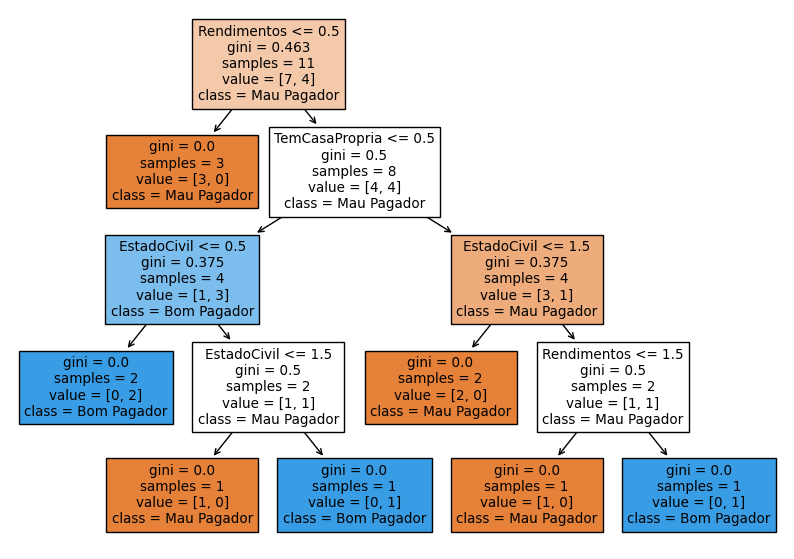

In [70]:
# Fazendo a previsão para o registro 12 (Não tem casa própria, Divorciado, Alto rendimentos)
novo_cliente = np.array([[0, 2, 2]]) 
previsao = clf.predict(novo_cliente);

# Exibindo a previsão
print(f"Classificação para o registro 12: {'Bom Pagador' if previsao[0] == 1 else 'Mau Pagador'}")

# Visualizando a árvore de decisão
plt.figure(figsize=(10, 7))
tree.plot_tree(clf, feature_names=['TemCasaPropria', 'EstadoCivil', 'Rendimentos'], class_names=['Mau Pagador', 'Bom Pagador'], filled=True)
plt.show();